création du nuage de points

In [2]:
import numpy as np    # si pas encore fait
from sklearn.utils import shuffle

# génération 100 points 3D suivant loi normale centrée
# chaque groupe est translaté d'un vecteur [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# génération des étiquettes de chaque groupe
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concaténation des données dans une matrice
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# permutation aléatoire des lignes de la matrice data
data, labels = shuffle(data, labels)

(500, 3)


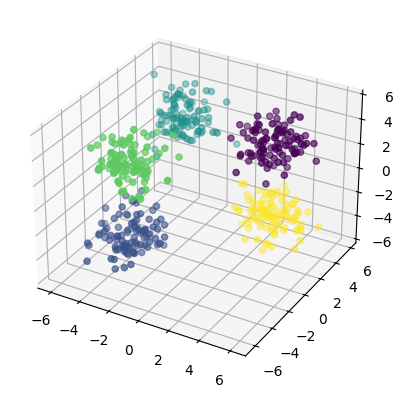

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# La couleur des points dépend de leur étiquette (label)
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

In [5]:
pred = kmeans.predict(data)

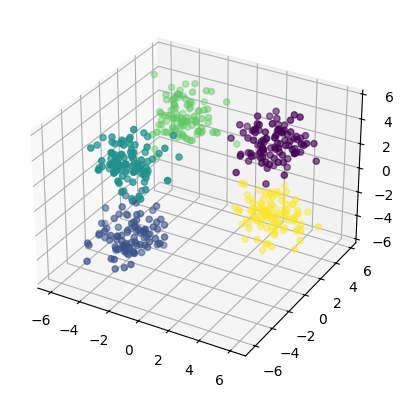

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

In [7]:
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9949848742198414

In [8]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.9949848742198414

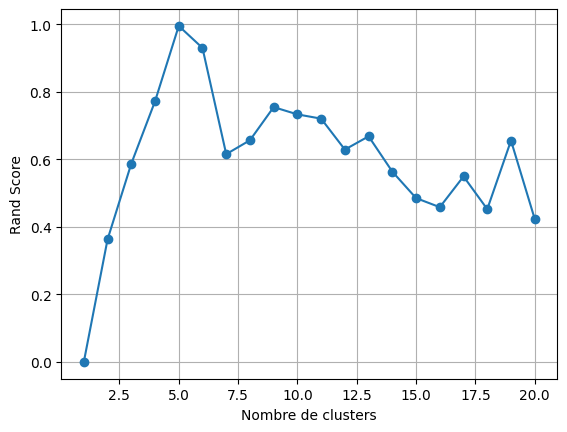

In [14]:
liste_graph_nb_cluster=[]
liste_graph_rand_score=[]
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, n_init=1, init='random').fit(data)
    liste_graph_nb_cluster.append(i)
    liste_graph_rand_score.append(metrics.adjusted_rand_score(kmeans.labels_, labels))

plt.plot(liste_graph_nb_cluster, liste_graph_rand_score, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Rand Score')
plt.grid(True)
plt.show()

La cohérence est plus forte lorsque le nombre de groupes demandés à l’algorithme de classification automatique correspond au nombre de groupes « naturels » dans les données. En effet, chercher dans les données un nombre de groupes différent revient à chercher à obtenir un modèle inadapté aux données, la variance des résultats sera donc plus forte (la cohérence plus faible). Pour des données réelles, en dimension élevée (donc non directement visualisables), une bonne stabilité des résultats indique que le nombre de groupes est adapté aux données.